In [ ]:
# imports
import os
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import geopandas as gpd
from scipy.interpolate import griddata
from shapely.geometry import Point
from pyproj import Proj, transform
from shapely.geometry import box
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import math

In [ ]:
meadow_dat = pd.read_csv('/Meadow_Depths.csv') #import meadow .csv file
meadow_avg_density = 0.281 # average density from meadow pit in g/cc
meadow_dat["SWE"] = (meadow_dat["Depth_cm"]) * meadow_avg_density # add data column for calculated swe at each point

In [ ]:
burnt_dat = pd.read_csv('/Burnt_Depths.csv') #import burnt .csv file
burnt_avg_density = 0.264 # average density from burnt pit in g/cc
burnt_dat["SWE"] = (burnt_dat["Depth_cm"]) * burnt_avg_density # add data column for calculated swe at each point

In [ ]:
tree_dat = pd.read_csv('/Tree_Depths.csv') #import tree .csv file
tree_avg_density = 0.260 # average density from tree pit in g/cc
tree_dat["SWE"] = (tree_dat["Depth_cm"]) * tree_avg_density # add data column for calculated swe at each point

In [ ]:
#Convert dataframe to geodataframe and use longitude and latitude data to determine UTM coordinates for meadow area
meadow_gdf = gpd.GeoDataFrame(meadow_dat, geometry=gpd.points_from_xy(meadow_dat.Longitude, meadow_dat.Latitude))
meadow_gdf = meadow_gdf.set_crs('epsg:4326') #set the crs to WGS84
meadow_gdf = meadow_gdf.to_crs('epsg:3742') #convert to NAD83(HARN) / UTM zone 12N

In [ ]:
#Do the same for burnt area data
burnt_gdf = gpd.GeoDataFrame(burnt_dat, geometry=gpd.points_from_xy(burnt_dat.Longitude, burnt_dat.Latitude))
burnt_gdf = burnt_gdf.set_crs('epsg:4326') #set the crs to WGS84
burnt_gdf = burnt_gdf.to_crs('epsg:3742') #convert to NAD83(HARN) / UTM zone 12N

In [ ]:
#Do the same for tree area data
tree_gdf = gpd.GeoDataFrame(tree_dat, geometry=gpd.points_from_xy(tree_dat.Longitude, tree_dat.Latitude))
tree_gdf = tree_gdf.set_crs('epsg:4326') #set the crs to WGS84
tree_gdf = tree_gdf.to_crs('epsg:3742') #convert to NAD83(HARN) / UTM zone 12N

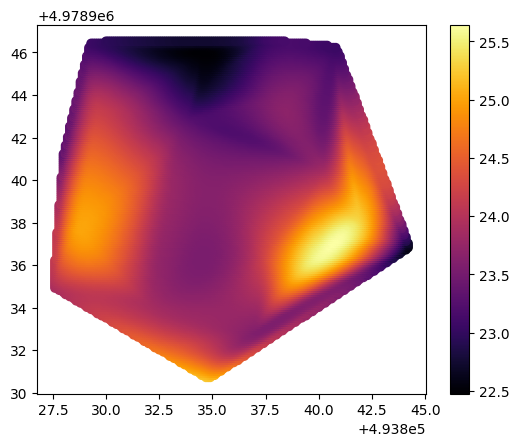

In [ ]:
#Define the extent of the interpolation grid
xmin, ymin, xmax, ymax = meadow_gdf.total_bounds
xres, yres = 0.1, 0.1  # Resolution of the interpolation grid

#Create a regular grid of points within the extent
x_grid, y_grid = np.meshgrid(np.arange(xmin, xmax, xres), np.arange(ymin, ymax, yres))

#Interpolate values from known SWE points to the grid
interpolated_meadow_cubic = griddata(
    (meadow_gdf.geometry.x, meadow_gdf.geometry.y),  # Known points
    meadow_gdf['SWE'],                         # Values at known points
    (x_grid, y_grid),                       # Grid points
    method='cubic'                         # Interpolation method
)

#Create geodataframe from interpolated values
interpolated_meadow_cubic = gpd.GeoDataFrame(
    {'value': interpolated_meadow_cubic.flatten()},
    geometry=gpd.points_from_xy(x_grid.flatten(), y_grid.flatten())
)

#Test plot of the interpolated values
interpolated_meadow_cubic.plot(column='value', cmap='inferno', legend=True)
plt.show()

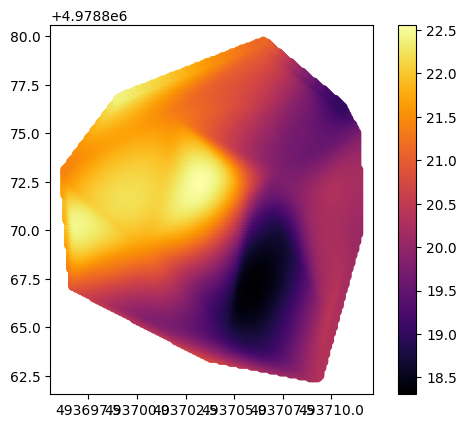

In [ ]:
#Define the extent of the interpolation grid
xmin, ymin, xmax, ymax = burnt_gdf.total_bounds
xres, yres = 0.1, 0.1  # Resolution of the interpolation grid

#Create a regular grid of points within the extent
x_grid, y_grid = np.meshgrid(np.arange(xmin, xmax, xres), np.arange(ymin, ymax, yres))

#Interpolate values from known SWE points to the grid
interpolated_burnt_cubic = griddata(
    (burnt_gdf.geometry.x, burnt_gdf.geometry.y),  # Known points
    burnt_gdf['SWE'],                         # Values at known points
    (x_grid, y_grid),                       # Grid points
    method='cubic'                         # Interpolation method
)

#Create geodataframe from interpolated values
interpolated_burnt_cubic = gpd.GeoDataFrame(
    {'value': interpolated_burnt_cubic.flatten()},
    geometry=gpd.points_from_xy(x_grid.flatten(), y_grid.flatten())
)

#Test plot of the interpolated values
interpolated_burnt_cubic.plot(column='value', cmap='inferno', legend=True)
plt.show()

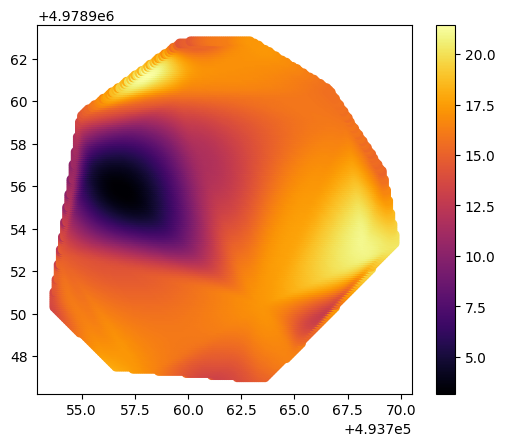

In [ ]:
#Define the extent of the interpolation grid
xmin, ymin, xmax, ymax = tree_gdf.total_bounds
xres, yres = 0.1, 0.1  # Resolution of the interpolation grid

#Create a regular grid of points within the extent
x_grid, y_grid = np.meshgrid(np.arange(xmin, xmax, xres), np.arange(ymin, ymax, yres))

#Interpolate values from known SWE points to the grid
interpolated_tree_cubic = griddata(
    (tree_gdf.geometry.x, tree_gdf.geometry.y),  # Known points
    tree_gdf['SWE'],                         # Values at known points
    (x_grid, y_grid),                       # Grid points
    method='cubic'                         # Interpolation method
)

#Create geodataframe from interpolated values
interpolated_tree_cubic = gpd.GeoDataFrame(
    {'value': interpolated_tree_cubic.flatten()},
    geometry=gpd.points_from_xy(x_grid.flatten(), y_grid.flatten())
)

#Test plot of the interpolated values
interpolated_tree_cubic.plot(column='value', cmap='inferno', legend=True)
plt.show()

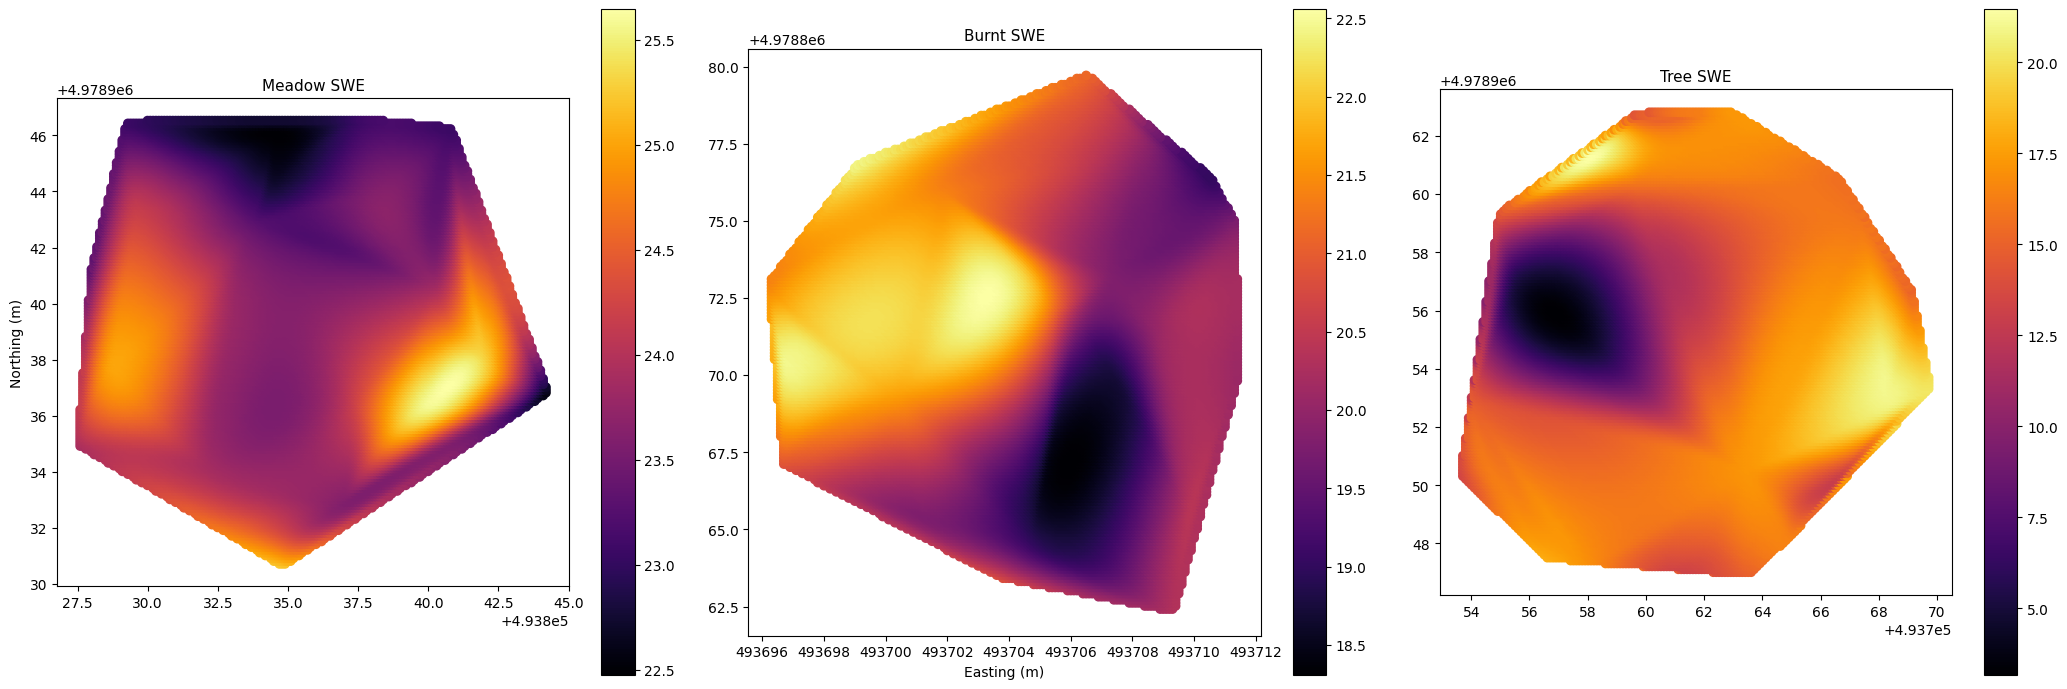

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(21,7))

interpolated_meadow_cubic.plot(ax=ax[0], column='value', cmap='inferno', legend=True)
ax[0].set_title('Meadow SWE', fontsize=11)
ax[0].set_ylabel('Northing (m)')

interpolated_burnt_cubic.plot(ax=ax[1], column='value', cmap='inferno', legend=True)
ax[1].set_title('Burnt SWE', fontsize=11)
ax[1].set_xlabel('Easting (m)')

interpolated_tree_cubic.plot(ax=ax[2], column='value', cmap='inferno', legend=True)
ax[2].set_title('Tree SWE', fontsize=11)

plt.tight_layout()

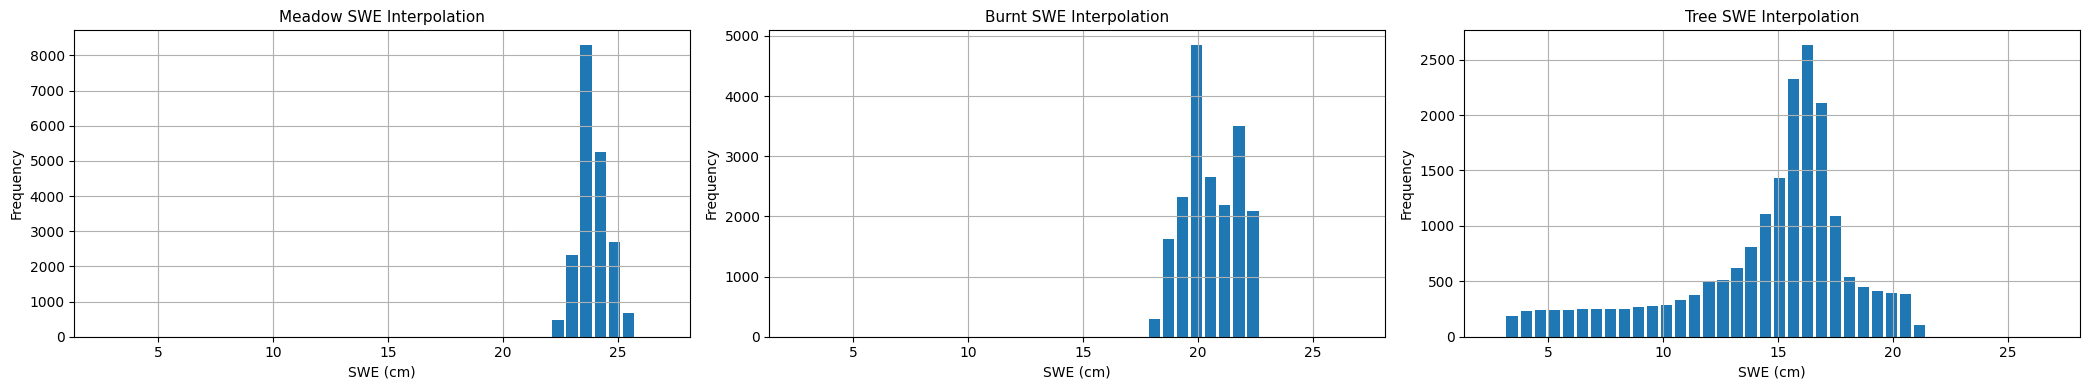

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(21,4))

interpolated_meadow_cubic.hist(ax=ax[0], range=[2.5, 27], column='value', rwidth=0.8, bins=40)
ax[0].set_title('Meadow SWE Interpolation', fontsize=11)
ax[0].set_xlabel('SWE (cm)')
ax[0].set_ylabel('Frequency')

interpolated_burnt_cubic.hist(ax=ax[1], range=[2.5, 27], column='value', rwidth=0.8, bins=40)
ax[1].set_title('Burnt SWE Interpolation', fontsize=11)
ax[1].set_xlabel('SWE (cm)')
ax[1].set_ylabel('Frequency')

interpolated_tree_cubic.hist(ax=ax[2], range=[2.5, 27], column='value', rwidth=0.8, bins=40)
ax[2].set_title('Tree SWE Interpolation', fontsize=11)
ax[2].set_xlabel('SWE (cm)')
ax[2].set_ylabel('Frequency')

plt.tight_layout()

In [ ]:
data = [['Meadow', 0.281, meadow_dat["Depth_cm"].mean()], ['Burnt', 0.264, burnt_dat["Depth_cm"].mean()], ['Tree', 0.260, tree_dat["Depth_cm"].mean()]]
df = pd.DataFrame(data, columns=['Sample Area', 'Avg. Density (g/cc)', 'Avg. Depth (cm)'])
df["Avg. SWE (cm)"] = round(df["Avg. Density (g/cc)"] * df["Avg. Depth (cm)"] * 1, 2) # 1 g/cc is density of water
df["Total Water (cubic meters)"] = round((df["Avg. SWE (cm)"]/100) * math.pi * 10**2, 2)
print(df)

  Sample Area  Avg. Density (g/cc)  Avg. Depth (cm)  Avg. SWE (cm)  \
0      Meadow                0.281             84.8          23.83   
1       Burnt                0.264             77.9          20.57   
2        Tree                0.260             59.3          15.42   

   Total Water (cubic meters)  
0                       74.86  
1                       64.62  
2                       48.44  


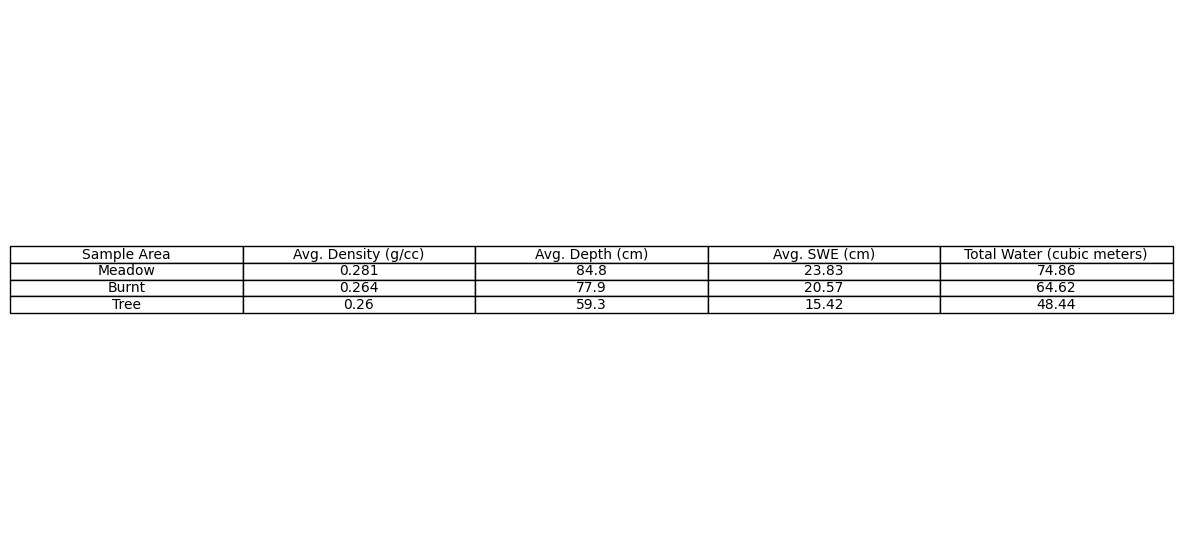

In [ ]:
# Plotting the DataFrame
fig, ax = plt.subplots(figsize=(15,7))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')

# Saving the plot as a JPG image
plt.savefig('data_metrics.jpg', bbox_inches='tight', pad_inches=0.1)



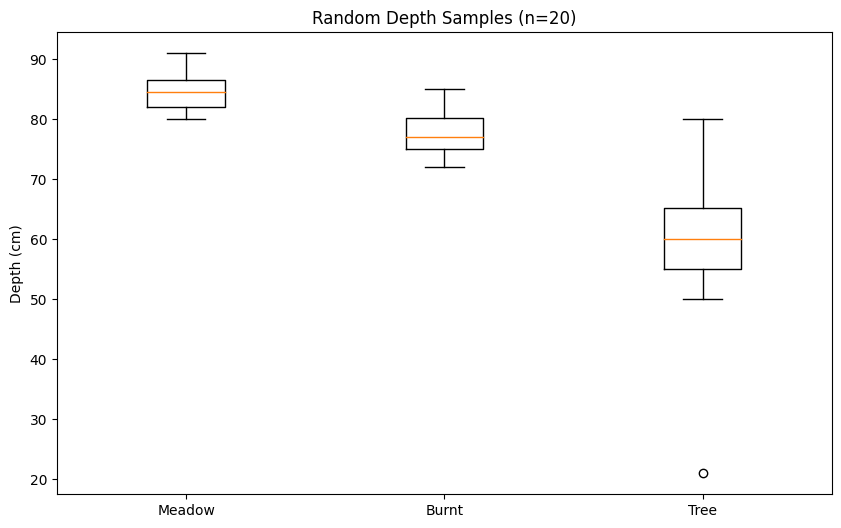

In [ ]:
# Data for box plots
data = [meadow_dat['Depth_cm'], burnt_dat['Depth_cm'], tree_dat['Depth_cm']]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot box plots for each environment's SWE data
ax.boxplot(data, labels=['Meadow', 'Burnt', 'Tree'])

# Set labels and title
ax.set_ylabel('Depth (cm)')
ax.set_title('Random Depth Samples (n=20)')

plt.show()

In [ ]:
# Calculate statistics for each box plot
statistics = {
    'Meadow': {
        'Median': np.median(meadow_dat['Depth_cm']),
        'Q1': np.percentile(meadow_dat['Depth_cm'], 25),
        'Q3': np.percentile(meadow_dat['Depth_cm'], 75),
        'Min': np.min(meadow_dat['Depth_cm']),
        'Max': np.max(meadow_dat['Depth_cm'])
    },
    'Burnt': {
        'Median': np.median(burnt_dat['Depth_cm']),
        'Q1': np.percentile(burnt_dat['Depth_cm'], 25),
        'Q3': np.percentile(burnt_dat['Depth_cm'], 75),
        'Min': np.min(burnt_dat['Depth_cm']),
        'Max': np.max(burnt_dat['Depth_cm'])
    },
    'Tree': {
        'Median': np.median(tree_dat['Depth_cm']),
        'Q1': np.percentile(tree_dat['Depth_cm'], 25),
        'Q3': np.percentile(tree_dat['Depth_cm'], 75),
        'Min': np.min(tree_dat['Depth_cm']),
        'Max': np.max(tree_dat['Depth_cm'])
    }
}

# Print statistics
for environment, stats in statistics.items():
    print(f"Statistics for {environment}:")
    print(f"Median: {stats['Median']:.2f}")
    print(f"Q1 (25th percentile): {stats['Q1']:.2f}")
    print(f"Q3 (75th percentile): {stats['Q3']:.2f}")
    print(f"Minimum: {stats['Min']:.2f}")
    print(f"Maximum: {stats['Max']:.2f}")
    print()

Statistics for Meadow:
Median: 84.50
Q1 (25th percentile): 82.00
Q3 (75th percentile): 86.50
Minimum: 80.00
Maximum: 91.00

Statistics for Burnt:
Median: 77.00
Q1 (25th percentile): 75.00
Q3 (75th percentile): 80.25
Minimum: 72.00
Maximum: 85.00

Statistics for Tree:
Median: 60.00
Q1 (25th percentile): 55.00
Q3 (75th percentile): 65.25
Minimum: 21.00
Maximum: 80.00

